# Decision Tree - Restaurant DataSet



OBJETIVO:  Mostrar a árvore gerada, a matriz de confusão, as métricas do modelo, e as regras geradas com as respectivas coberturas. 

In [131]:
# Importando bibliotecas
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

import pydot
import pydotplus

In [145]:
# Ler dados do DataSet
csv_dir_treinamento = "/content/sample_data/geral.csv"
data_treino = pd.read_csv(csv_dir_treinamento, delimiter=";")

In [146]:
# Tratar dados nominais para númericos (Treinamento)
treinamento_classification = data_treino['conc']
data_treino.drop(["conc"], axis=1, inplace=True)
data_treino.drop(["Exemplo"], axis=1, inplace=True)
treinamento_dados = pd.get_dummies(data_treino, columns=['Cliente', 'Preço', 'Tipo', 'Tempo'])

In [147]:
# Atualizar tabela com binários
labelencoder =  preprocessing.LabelEncoder()
treinamento_dados['Alternativo'] = labelencoder.fit_transform(treinamento_dados['Alternativo'])
treinamento_dados['Bar'] = labelencoder.fit_transform(treinamento_dados['Bar'])
treinamento_dados['Sex/Sab'] = labelencoder.fit_transform(treinamento_dados['Sex/Sab'])
treinamento_dados['fome'] = labelencoder.fit_transform(treinamento_dados['fome'])
treinamento_dados['Chuva'] = labelencoder.fit_transform(treinamento_dados['Chuva'])
treinamento_dados['Res'] = labelencoder.fit_transform(treinamento_dados['Res'])

In [151]:
dataset_teste = treinamento_dados.loc[8:]
dataset_teste_class = treinamento_classification.loc[8:]
dataset_treino = treinamento_dados.loc[0:7]
dataset_treino_class = treinamento_classification.loc[0:7]

In [155]:
# Criando a árvore e definindo o criterio de criação usando entropia
tree_restaurant = DecisionTreeClassifier(criterion="entropy")
tree_restaurant = tree_restaurant.fit(dataset_treino, dataset_treino_class)

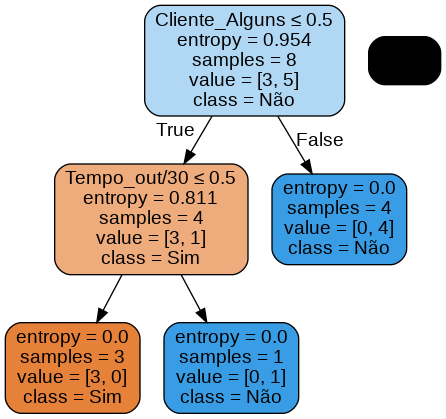

In [156]:
dot_data = tree.export_graphviz(tree_restaurant, out_file=None,
                                feature_names=dataset_treino.columns.values,
                                class_names=treinamento_classification.unique(),
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydot.graph_from_dot_data(dot_data)
graph[0].write_png('tree_restaurant.png')

from IPython.display import Image
Image(filename='tree_restaurant.png')

In [77]:
# Importar a biblioteca para mostrar a matriz de confusão da árvore
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

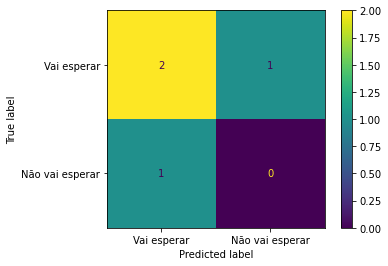

In [158]:
conf_matrix = confusion_matrix(dataset_teste_class, tree_restaurant.predict(dataset_teste))
labels = ["Vai esperar", "Não vai esperar"]
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=labels)
cmd.plot(values_format="d")
plt.show()

In [159]:
# Importando bibliotecas para calcular métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [160]:
# Mostrar métricas
print("Accuracy score = ", accuracy_score(dataset_teste_class, tree_restaurant.predict(dataset_teste)))
print('\n')
print(classification_report(dataset_teste_class, tree_restaurant.predict(dataset_teste), target_names=labels))
print('\n')

tn, fp, fn, tp = confusion_matrix(dataset_teste_class, tree_restaurant.predict(dataset_teste)).ravel()
tnr = tn / (tn + fp) # true negative rate 
fpr = fp / (tn + fp) # false positive rate 
fnr = fn / (fn + tp) # false negative rate 
tpr = tp / (tp + fn) # true positive rate
print('True negative rate: ' + str(tnr))
print('False positive rate: ' + str(fpr))
print('False negative rate: ' + str(fnr))
print('True positive rate: ' + str(tpr))


Accuracy score =  0.5


                 precision    recall  f1-score   support

    Vai esperar       0.67      0.67      0.67         3
Não vai esperar       0.00      0.00      0.00         1

       accuracy                           0.50         4
      macro avg       0.33      0.33      0.33         4
   weighted avg       0.50      0.50      0.50         4



True negative rate: 0.6666666666666666
False positive rate: 0.3333333333333333
False negative rate: 1.0
True positive rate: 0.0
